# Data Analytics Project Using Youtube video Data From A Youtube Channel

## Contents
 1. Aims, Objetives, and Background
  2. Programming - Project Set-up and Data Collection
  3. Data pre-processing
  4. Data Analytics

## 1. Aims, objectives, and background

### 1.1 Introduction

This project was designed for the intention of being a hands-on learning practice for data analytics. 

Purpose of the project will be to retrieve data from a specified channel, process and clean the data, then analyze it with graphical software. 

This project was created with the aid of the video, "Youtube API for Python: How to Create a Unique Data Portfolio Project". Content was adapted to better suit discovery interests that differed from the original video's objective.

Link: https://www.youtube.com/watch?v=D56_Cx36oGY

### 1.2 Aims and Objectives

This project will aim to explore the following:
* Leraning how to use the Youtube API to obtain channel data
* Analyzing video data to explore what possibles factors contributing to viewership
* Explore common themes of the chanel(i.e. Tags frequency used, keyword frequency in titles)

## 2. Programming - Project Set-up and Data Collection

### 2.1 Configuration data

In [27]:
#ENV file reading packages
import os
from dotenv import load_dotenv
#Data anayltics packages
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
from dateutil import parser
import isodate
#Graphing software pakages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Wordcloud software
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
load_dotenv()
api_key = os.getenv('YOUTUBE_API_KEY') #A Youtube API key must be set in an .env file with they key of YOUTUBE_API_KEY

In [29]:
channel_ids = ['UCMsP14U4Pp4tcm52ryt14zA'] #Midwest Bow & Arrow channel ID

In [30]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=api_key)

### 2.2 Functions

In [31]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'paylistId':item['contentDetails']['relatedPlaylists']['uploads']
               }
        
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [32]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [33]:
channel_stats

,channelName,subscribers,views,totalVideos,paylistId
0,Midwest Bow & Arrow,587,23065,9,UUMsP14U4Pp4tcm52ryt14zA


In [34]:
playlist_id = 'UUMsP14U4Pp4tcm52ryt14zA'

def get_video_ids(youtube, playlist_id):
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUMsP14U4Pp4tcm52ryt14zA",
        maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    next_page_token=response.get('nextPageToken')
    while(next_page_token is not None):
        request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUMsP14U4Pp4tcm52ryt14zA",
        maxResults = 50,
        pageToken = next_page_token
    )
        response = request.execute()
    
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token=response.get('nextPageToken')
    
    return video_ids

In [35]:
video_ids = get_video_ids(youtube,playlist_id)
len(video_ids)

9

In [36]:
def get_video_details(youtube, video_ids):
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)

In [37]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,TuIJMMTlUqU,Midwest Bow & Arrow,80# Hoyt Ventum Pro 33 Speed Test,check out https://www.bwanaarchery.com/\ngo fo...,"[HOYT Z1S, HOYT VENTUM PRO, 80LB BOW, 80# BOW,...",2023-01-09T14:50:12Z,878,17,None,0,PT48S,hd,false
1,CwDmKZ85B14,Midwest Bow & Arrow,Hoyt Z1S vs PSE Omen vs 80# Ventum Pro 33 - SP...,Bwana Archery\nShoot off between the speed bow...,"[HOYT Z1S, HOYT VENTUM PRO, 80LB BOW, 80# BOW,...",2022-12-29T14:45:00Z,8232,89,None,29,PT2M38S,hd,false
2,YaWiiPFDL4A,Midwest Bow & Arrow,Create Your One Stick: The Wingman Platform by...,Part 2/2 will show you how to use it. \n\nLink...,"[archery country, powder ridge 3d shoot, pse e...",2022-08-17T13:44:45Z,726,17,None,1,PT6M50S,hd,false
3,vMgFeG9YSHU,Midwest Bow & Arrow,Iron Will Broadheads - Solid vs Vented Noise Test,Pure unscientific broadhead noise testing betw...,"[IRON WILL ARCHERY, iron will broadheads, iron...",2021-09-23T14:00:18Z,709,10,None,1,PT24S,hd,false
4,8yapCQvNerg,Midwest Bow & Arrow,Iron Will Broadheads - How LOUD are the vented...,Pure unscientific broadhead noise testing betw...,"[IRON WILL ARCHERY, iron will broadheads, iron...",2021-09-19T17:00:05Z,4125,48,None,3,PT1M22S,hd,false
5,f27RBDQ-qII,Midwest Bow & Arrow,The Sound of Archery - South Forty Archers,would you just listen to that,"[archery, mathews, pse archery, hoyt archery, ...",2021-07-12T13:30:04Z,1158,16,None,0,PT37S,hd,false
6,Ynvrepob1QA,Midwest Bow & Arrow,Mathews UltraRest Integrated MX (QAD) - Slow M...,Mathews VXR 31.5\nMathews UltraRest Integrated...,"[mathews vxr, mathews vxr 31.5, mathews vxr 28...",2020-11-15T03:26:20Z,7034,44,None,1,PT27S,hd,false
7,JsGGLmrDol4,Midwest Bow & Arrow,Hoyt REDWRX Carbon RX-1 Ultra - Nockturnal Lig...,Hoyt REDWRX Carbon RX-1 Ultra - Nockturnal Lig...,"[hoyt, hoyt archery, hoyt 2021, lighted nocks,...",2020-11-06T21:00:03Z,118,5,None,0,PT30S,hd,false
8,jjECrxjVLEw,Midwest Bow & Arrow,Hoyt Defiant 34 - Red Nockturnal Lighted Nocks,Nockturnal Lighted Nocks are awesome! \nHoyt D...,"[hoyt, hoyt archery, hoyt 2021, lighted nocks,...",2020-11-04T03:29:38Z,108,4,None,0,PT18S,hd,false


In [38]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)

In [39]:
comments_df = get_comments_in_videos(youtube,video_ids)
comments_df

,video_id,comments
0,TuIJMMTlUqU,[]
1,CwDmKZ85B14,"[at 29.5"" you're in the first position of the ..."
2,YaWiiPFDL4A,[Perfect been looking for this! Thank you]
3,vMgFeG9YSHU,[Not much difference if any. They'll hear the ...
4,8yapCQvNerg,"[This doesn’t prove it’s the Broadhead, easily..."
5,f27RBDQ-qII,[]
6,Ynvrepob1QA,[Wow the rest dropped all the way down before ...
7,JsGGLmrDol4,[]
8,jjECrxjVLEw,[]


In [40]:
comments_df['comments'][6]

['Wow the rest dropped all the way down before the arrow was halfway through. not impressed!']

## 3. Data-Preprocessing

In [41]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [42]:
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [43]:
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [44]:
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [45]:
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [46]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio
0,TuIJMMTlUqU,Midwest Bow & Arrow,80# Hoyt Ventum Pro 33 Speed Test,check out https://www.bwanaarchery.com/\ngo fo...,"[HOYT Z1S, HOYT VENTUM PRO, 80LB BOW, 80# BOW,...",2023-01-09 14:50:12+00:00,878.0,17.0,NaN,0.0,PT48S,hd,false,Monday,0 days 00:00:48,34,19.362187,0.000000
1,CwDmKZ85B14,Midwest Bow & Arrow,Hoyt Z1S vs PSE Omen vs 80# Ventum Pro 33 - SP...,Bwana Archery\nShoot off between the speed bow...,"[HOYT Z1S, HOYT VENTUM PRO, 80LB BOW, 80# BOW,...",2022-12-29 14:45:00+00:00,8232.0,89.0,NaN,29.0,PT2M38S,hd,false,Thursday,0 days 00:02:38,34,10.811467,3.522838
2,YaWiiPFDL4A,Midwest Bow & Arrow,Create Your One Stick: The Wingman Platform by...,Part 2/2 will show you how to use it. \n\nLink...,"[archery country, powder ridge 3d shoot, pse e...",2022-08-17 13:44:45+00:00,726.0,17.0,NaN,1.0,PT6M50S,hd,false,Wednesday,0 days 00:06:50,27,23.415978,1.377410
3,vMgFeG9YSHU,Midwest Bow & Arrow,Iron Will Broadheads - Solid vs Vented Noise Test,Pure unscientific broadhead noise testing betw...,"[IRON WILL ARCHERY, iron will broadheads, iron...",2021-09-23 14:00:18+00:00,709.0,10.0,NaN,1.0,PT24S,hd,false,Thursday,0 days 00:00:24,27,14.104372,1.410437
4,8yapCQvNerg,Midwest Bow & Arrow,Iron Will Broadheads - How LOUD are the vented...,Pure unscientific broadhead noise testing betw...,"[IRON WILL ARCHERY, iron will broadheads, iron...",2021-09-19 17:00:05+00:00,4125.0,48.0,NaN,3.0,PT1M22S,hd,false,Sunday,0 days 00:01:22,27,11.636364,0.727273
5,f27RBDQ-qII,Midwest Bow & Arrow,The Sound of Archery - South Forty Archers,would you just listen to that,"[archery, mathews, pse archery, hoyt archery, ...",2021-07-12 13:30:04+00:00,1158.0,16.0,NaN,0.0,PT37S,hd,false,Monday,0 days 00:00:37,35,13.816926,0.000000
6,Ynvrepob1QA,Midwest Bow & Arrow,Mathews UltraRest Integrated MX (QAD) - Slow M...,Mathews VXR 31.5\nMathews UltraRest Integrated...,"[mathews vxr, mathews vxr 31.5, mathews vxr 28...",2020-11-15 03:26:20+00:00,7034.0,44.0,NaN,1.0,PT27S,hd,false,Sunday,0 days 00:00:27,29,6.255331,0.142167
7,JsGGLmrDol4,Midwest Bow & Arrow,Hoyt REDWRX Carbon RX-1 Ultra - Nockturnal Lig...,Hoyt REDWRX Carbon RX-1 Ultra - Nockturnal Lig...,"[hoyt, hoyt archery, hoyt 2021, lighted nocks,...",2020-11-06 21:00:03+00:00,118.0,5.0,NaN,0.0,PT30S,hd,false,Friday,0 days 00:00:30,31,42.372881,0.000000
8,jjECrxjVLEw,Midwest Bow & Arrow,Hoyt Defiant 34 - Red Nockturnal Lighted Nocks,Nockturnal Lighted Nocks are awesome! \nHoyt D...,"[hoyt, hoyt archery, hoyt 2021, lighted nocks,...",2020-11-04 03:29:38+00:00,108.0,4.0,NaN,0.0,PT18S,hd,false,Wednesday,0 days 00:00:18,30,37.037037,0.000000


## 4. Data Analytics

### 4.1 Best Performing Videos

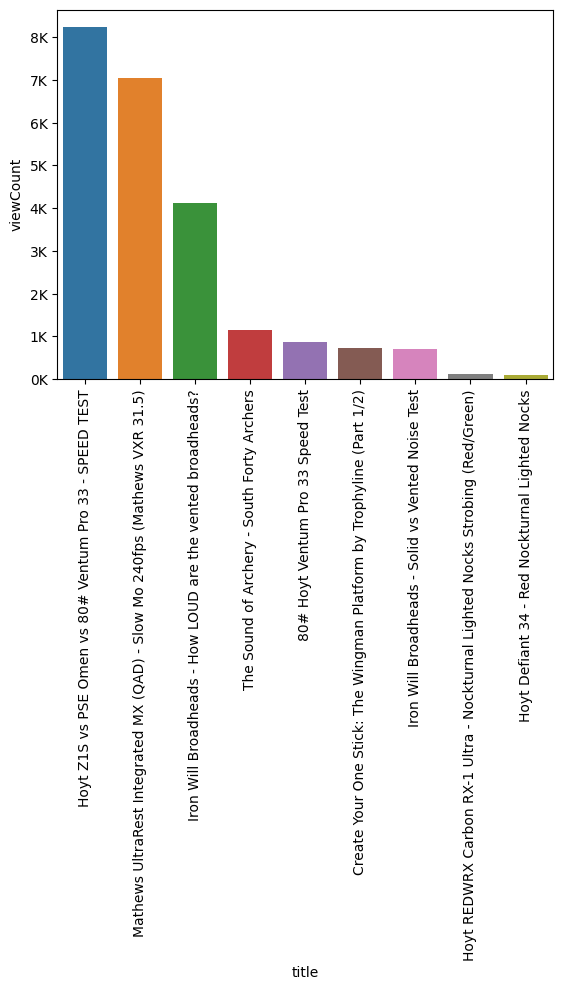

In [47]:
ax = sns.barplot(x='title', y='viewCount', data=video_df.sort_values('viewCount', ascending=False)[0:9])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### 4.2 View distribution per video

<Axes: xlabel='channelTitle', ylabel='viewCount'>

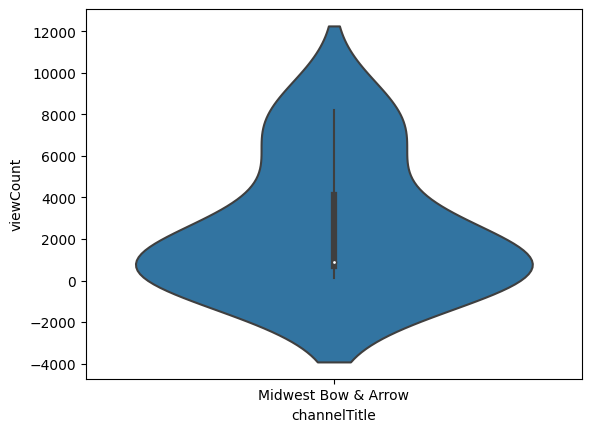

In [48]:

sns.violinplot(x=video_df['channelTitle'], y=video_df['viewCount'])


### 4.3 Comment vs Like Count

<Axes: xlabel='likeRatio', ylabel='viewCount'>

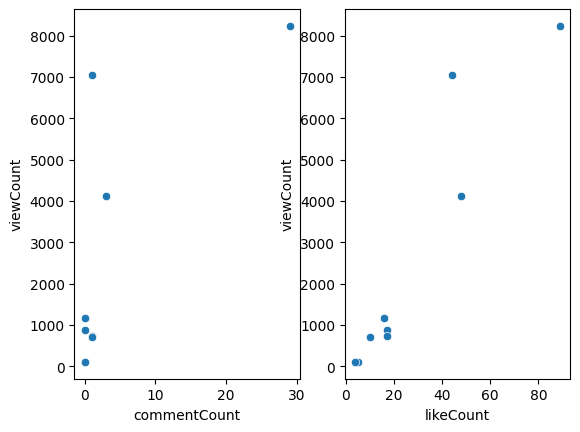

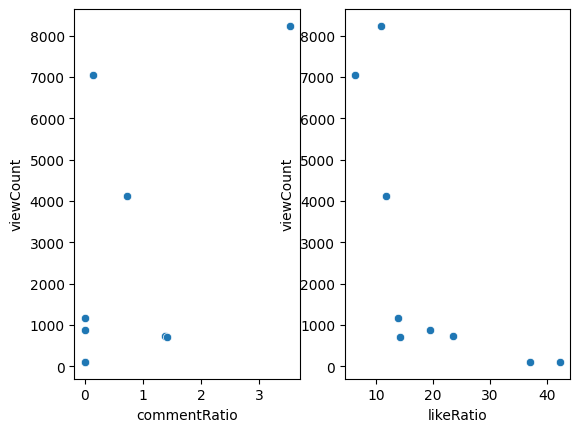

In [49]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

#Ratio
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[1])

### 4.4 Average Video Duration

<Axes: xlabel='durationSecs', ylabel='Count'>

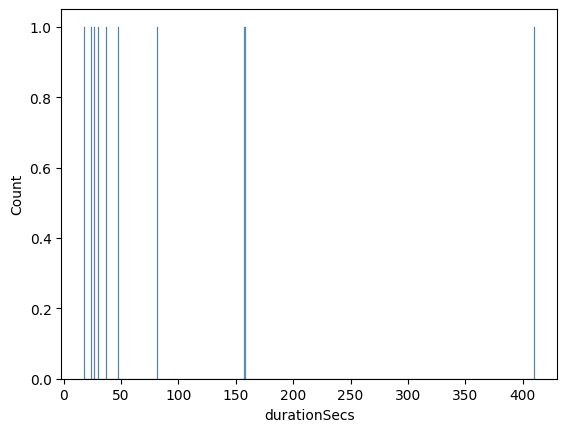

In [50]:
sns.histplot(data=video_df, x="durationSecs", bins=30)

### 4.5 Word Cloud - Video Titles

Which words appear most often in the videos?

In [51]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

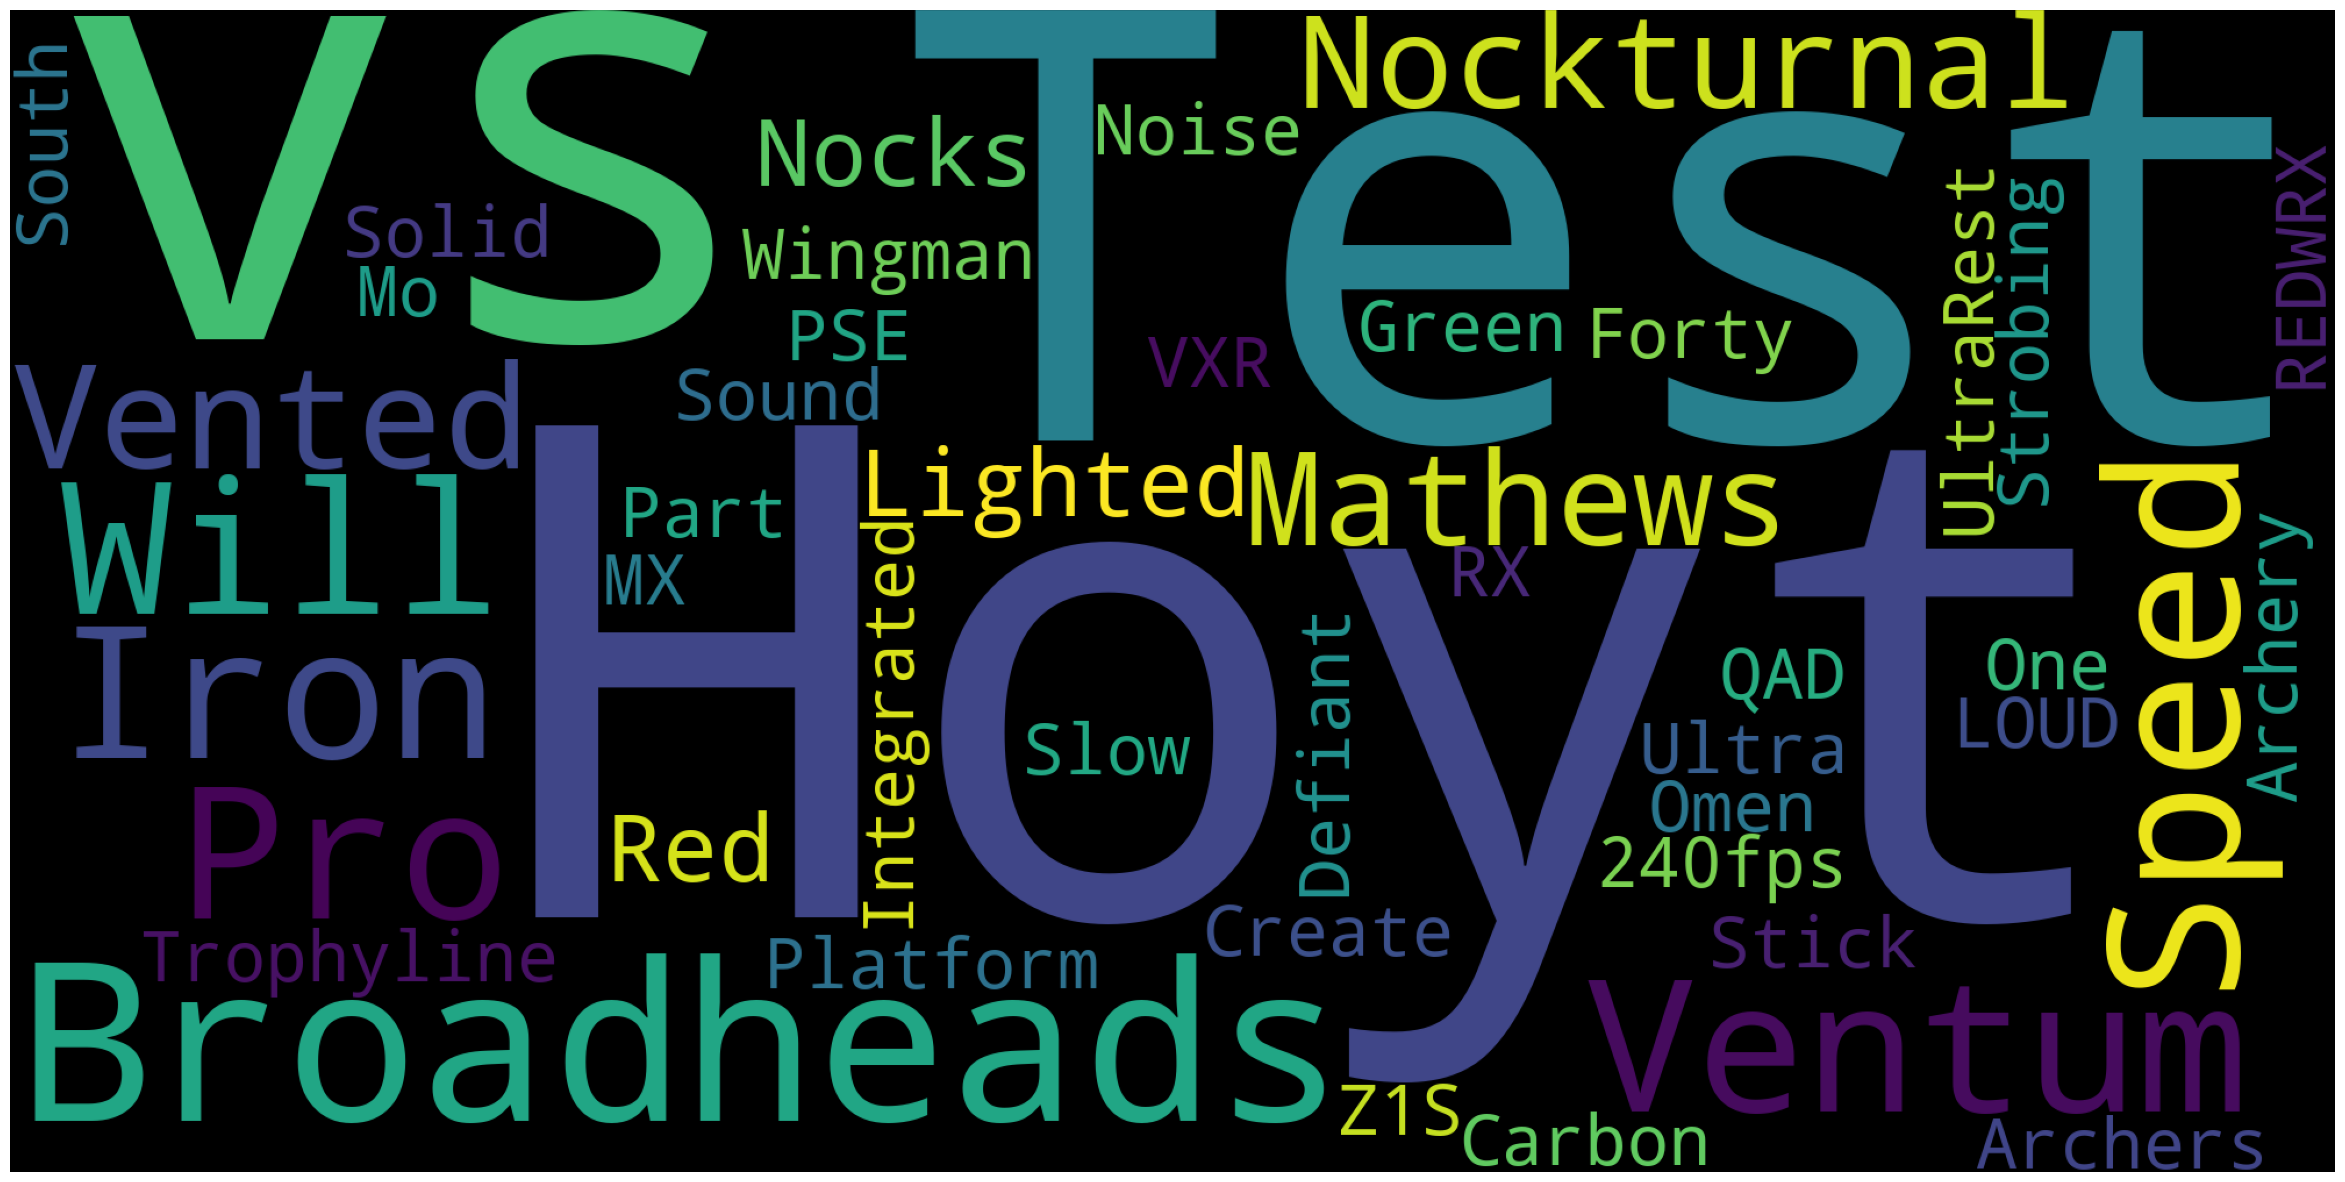

In [52]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### 4.6 Number of tags vs views

<Axes: xlabel='tagsCount', ylabel='viewCount'>

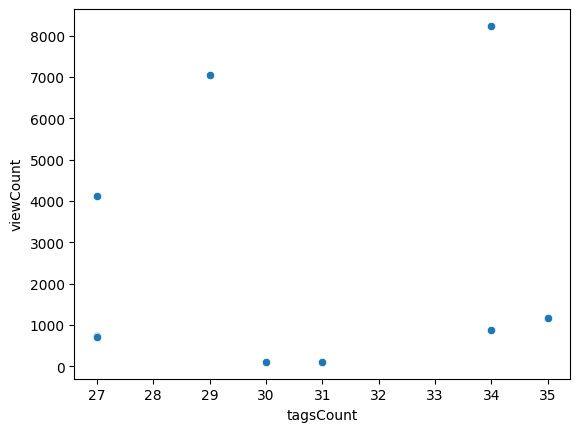

In [53]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount")

### 4.7 Word Cloud - Tags in Videos

In [55]:
stop_words = set(stopwords.words('english'))
video_df['tags_no_stopwords'] = video_df['tags'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_tags = list([a for b in video_df['tags_no_stopwords'].tolist() for a in b])
all_tags_str = ' '.join(all_words) 

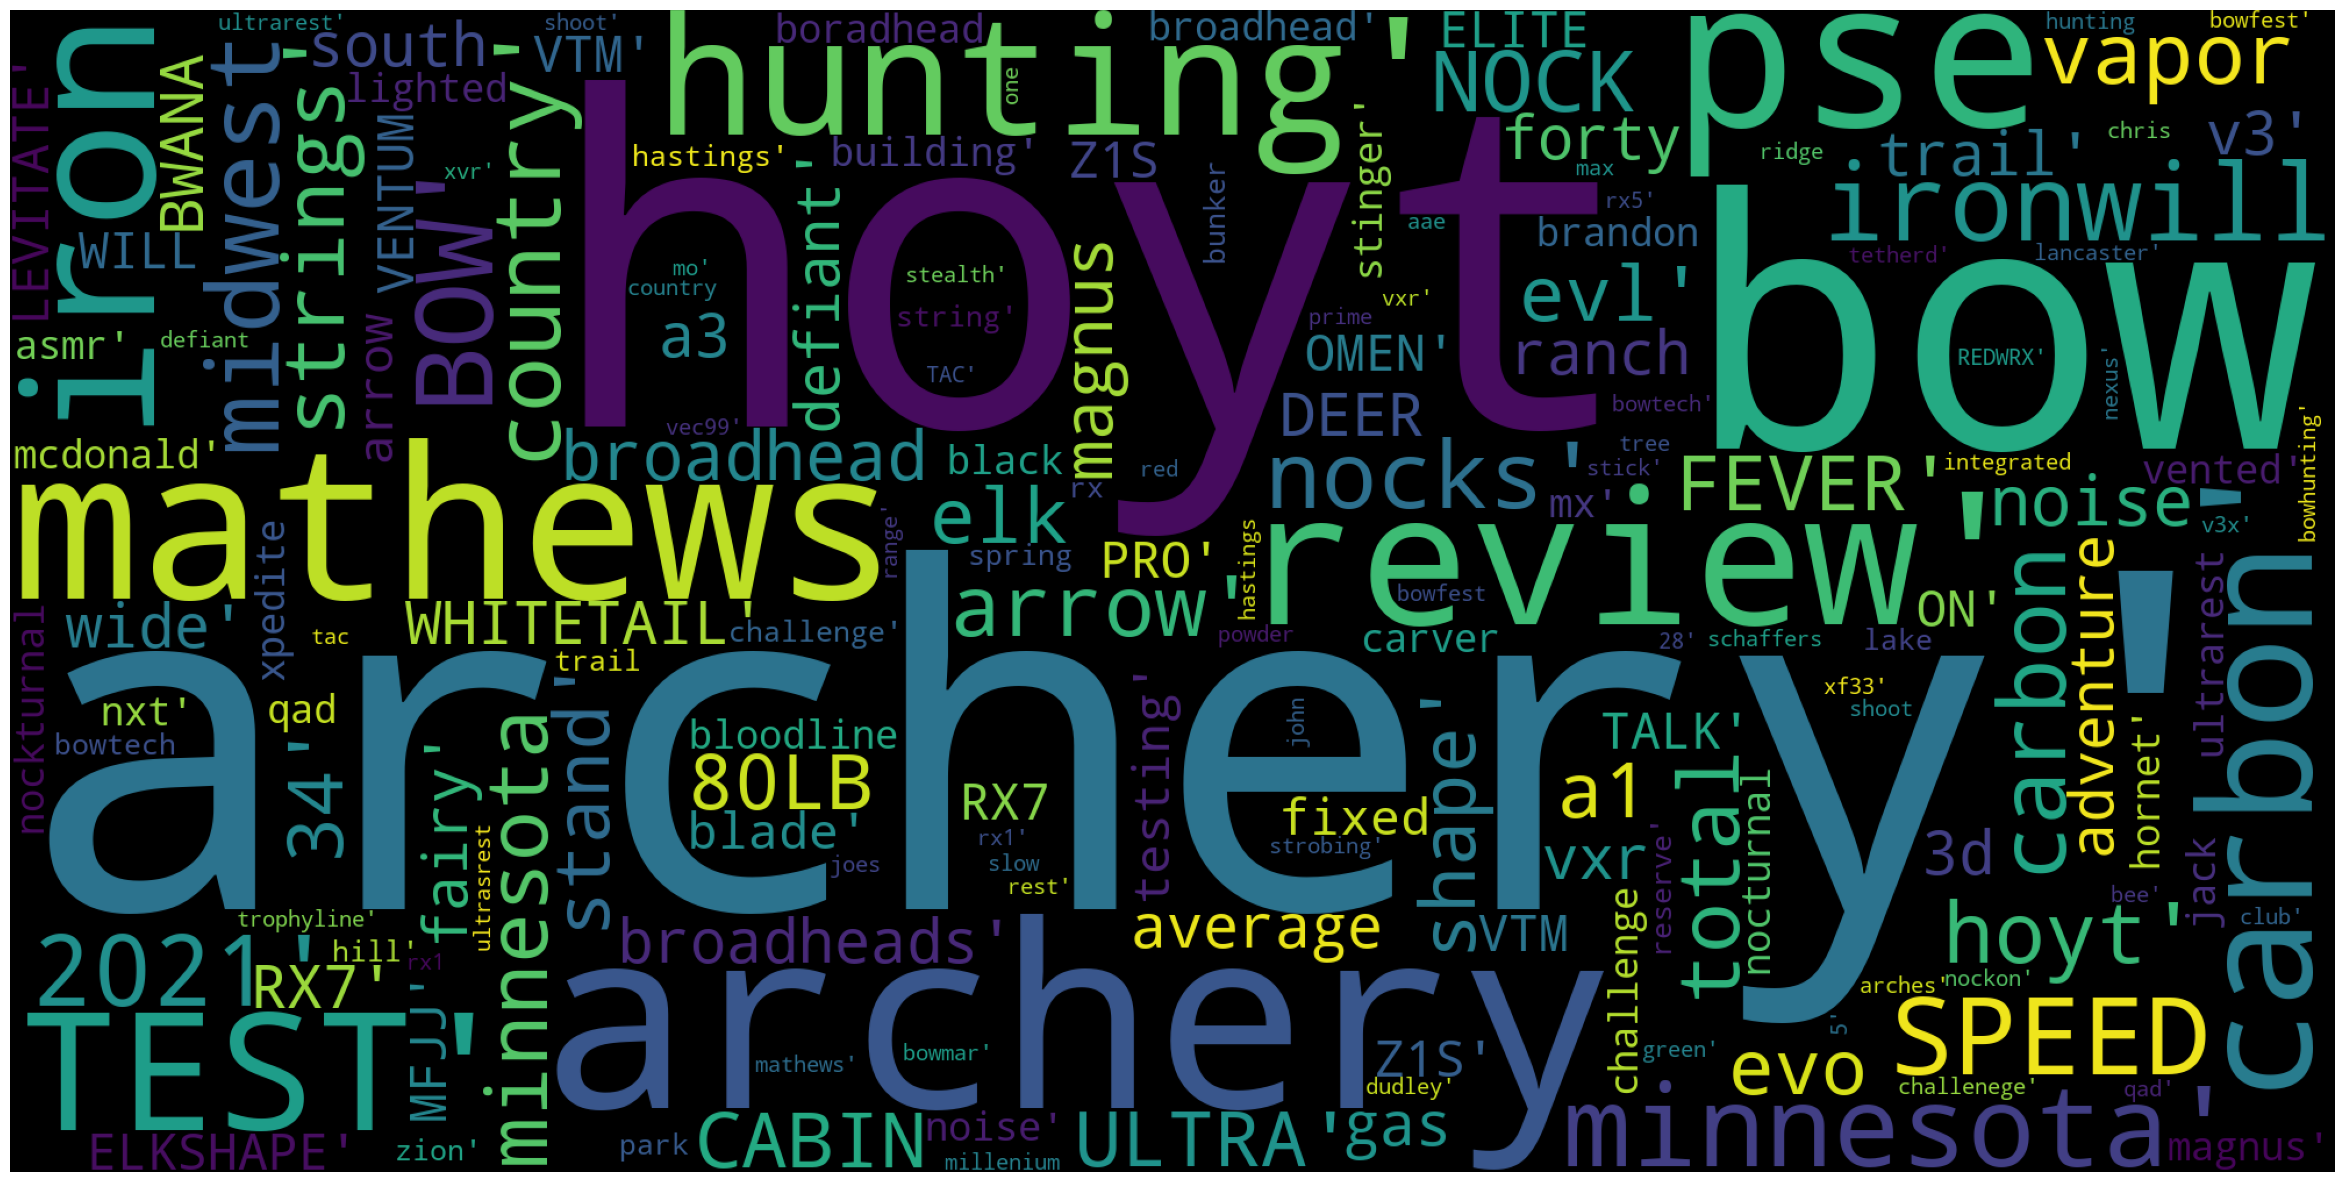

In [56]:
wordcloudtags = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_tags_str)
plot_cloud(wordcloudtags)

## 5. Conclusions and further ideas

This proeject provided an introduction into data analytics with an exploratory opportunity of dissecting video channel data. Some initital observations made from this project was
* The number of likes is increased as the views increase
* The ratio of likes seems to decrease as views increase
* Number of tags do not have a consistent view count to them

**Data limitations**
There is not too much that can concluded through this project, for a number of reasons
* Dataset is too small(9 videos). The original project with a comparatively large dataset also deemed their dataset too small(~3,700 videos)
* This is only anlayzing one channel. Including more channels of similar niches can help better compare data patterns
* Other factors such as market strategy, audio-visual content, thumbnails, and subscribers of the channel were not taken into considerations

**Ideas for improvement**
* Expanding the project to include several other archery-related channels increase the dataset in quantity and variety
* Doing a deep dive into viewership vs tags will be an interesting discussion to see if specific tags draw in more viewership
* Identify if video quantity of a channel plays a factor on increased viewership overall